In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
#load and read the dataset
import warnings
df = pd.read_csv("Groceries data.csv")

In [3]:
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [4]:
df.shape

(38765, 7)

In [5]:
#display the information regarding the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [6]:
#capture the description of the dataset
df.describe()

,Member_number,year,month,day,day_of_week
count,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000
mean,3003.641868,2014.528518,6.477570,15.753231,3.014498
std,1153.611031,0.499193,3.431561,8.801391,1.987669
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,2002.000000,2014.000000,4.000000,8.000000,1.000000
50%,3005.000000,2015.000000,6.000000,16.000000,3.000000
75%,4007.000000,2015.000000,9.000000,23.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


In [7]:
#check for any null values in the dataset
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

The above output indicates that there are no null values present in the dataset

In [8]:
#displaying the top 5 items in the dataset
df['itemDescription'].head()

0      tropical fruit
1          whole milk
2           pip fruit
3    other vegetables
4          whole milk
Name: itemDescription, dtype: object

In [9]:
#to remove white spaces or specific characters from the beginning and the end of the string
df['itemDescription']=df['itemDescription'].str.strip()

In [10]:
df['itemDescription'].head()

0      tropical fruit
1          whole milk
2           pip fruit
3    other vegetables
4          whole milk
Name: itemDescription, dtype: object

In [11]:
#convert to date-time format
df.Date = pd.to_datetime(df.Date)
df['Member_number'] = df['Member_number'].astype('str')

In [12]:
df['Member_number']

0        1808
1        2552
2        2300
3        1187
4        3037
         ... 
38760    4471
38761    2022
38762    1097
38763    1510
38764    1521
Name: Member_number, Length: 38765, dtype: object

Exploratory Data Analysis

In [13]:
#number of customers
df['Member_number'].nunique()

3898

In [14]:
#number of unique items
df['itemDescription'].nunique()

167

In [15]:
#top 25 products sold
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
top_25=df.itemDescription.value_counts().sort_values(ascending=False)[0:25]
fig = px.bar(top_25,color=top_25.index, labels={'value':'Quantity Sold','index':'GroceryItems'})
fig.update_layout(showlegend=False, title_text='Top 25 Groceries Sold',title_x=0.5, title={'font':{'size':20}})
fig.show()

In [16]:
#bottom 25 products sold
bot_25=df.itemDescription.value_counts().sort_values(ascending=False)[-25:]
fig = px.bar(bot_25,color=bot_25.index, labels={'value':'Quantity Sold','index':'GroceryItems'})
fig.update_layout(showlegend=False, title_text='Bottom 25 Groceries Sold',title_x=0.5, title={'font':{'size':20}})
fig.show()

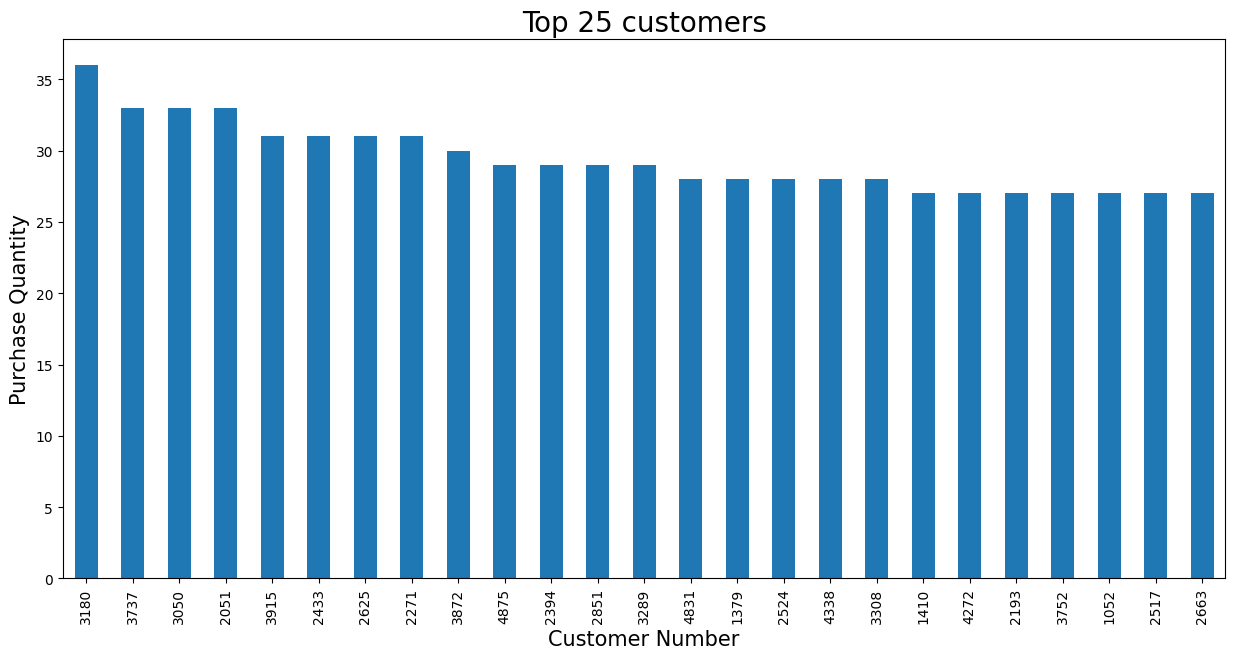

In [17]:
#number of items bought by the top 25 customers
top_25c = df.groupby('Member_number').agg(PurchaseQuantity=('itemDescription','count')).sort_values(by='PurchaseQuantity',ascending=False)[0:25]
top_25c.plot(kind='bar', figsize=(15,7), legend=None)
plt.title('Top 25 customers', fontsize=20)
plt.xlabel('Customer Number', fontsize=15)
plt.ylabel('Purchase Quantity', fontsize=15)
plt.show()

In [18]:
#frequency of items sold
item_freq = df.groupby(pd.Grouper(key='itemDescription')).size().reset_index(name='count')
fig = px.treemap(item_freq, path=['itemDescription'], values='count')
fig.update_layout(title_text='Frequency of the Items Sold', title_x=0.5, title_font=dict(size=18))
fig.update_traces(textinfo="label+value")
fig.show()

In [19]:
df['itemDescription'].values

array(['tropical fruit', 'whole milk', 'pip fruit', ..., 'cake bar',
       'fruit/vegetable juice', 'cat food'], dtype=object)

Seasonal analysis and impact

In [20]:
#Adding additional columns to better analyse the data according to seasons
df['Quantity']=1
df['Date']=df['Date'].astype('datetime64[ns]')
df['Month'] = df.Date.dt.month
df['Month'] = df['Date'].apply(lambda x:x.month)
df['Day of Week'] = df['Date'].apply(lambda time: time.dayofweek)
df['Year'] = df['Date'].apply(lambda t:t.year)
df['Day'] = df['Date'].apply(lambda t : t.day)
df

,Member_number,Date,itemDescription,year,month,day,day_of_week,Quantity,Month,Day of Week,Year,Day
0,1808,2015-07-21,tropical fruit,2015,7,21,1,1,7,1,2015,21
1,2552,2015-05-01,whole milk,2015,5,1,4,1,5,4,2015,1
2,2300,2015-09-19,pip fruit,2015,9,19,5,1,9,5,2015,19
3,1187,2015-12-12,other vegetables,2015,12,12,5,1,12,5,2015,12
4,3037,2015-01-02,whole milk,2015,1,2,4,1,1,4,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6,1,8,6,2014,10
38761,2022,2014-02-23,candy,2014,2,23,6,1,2,6,2014,23
38762,1097,2014-04-16,cake bar,2014,4,16,2,1,4,2,2014,16
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2,1,3,2,2014,12


In [21]:
#Season : 1=Monsoon 2=Summer 3=Winter
#mapping months to seasons
m_to_s = {1: 3, 2: 2, 3: 2, 4: 2, 5: 2, 6: 1, 7: 1, 8: 1, 9: 1, 10: 3, 11: 3, 12: 3}
df['season']=df['Month'].map(m_to_s)
df

,Member_number,Date,itemDescription,year,month,day,day_of_week,Quantity,Month,Day of Week,Year,Day,season
0,1808,2015-07-21,tropical fruit,2015,7,21,1,1,7,1,2015,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4,1,5,4,2015,1,2
2,2300,2015-09-19,pip fruit,2015,9,19,5,1,9,5,2015,19,1
3,1187,2015-12-12,other vegetables,2015,12,12,5,1,12,5,2015,12,3
4,3037,2015-01-02,whole milk,2015,1,2,4,1,1,4,2015,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6,1,8,6,2014,10,1
38761,2022,2014-02-23,candy,2014,2,23,6,1,2,6,2014,23,2
38762,1097,2014-04-16,cake bar,2014,4,16,2,1,4,2,2014,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2,1,3,2,2014,12,2


In [22]:
#seasonwise grouping of product quantities
def seasonwise(x):
    df_n=df[df['itemDescription']==x].groupby('season').count()
    print(df_n)
seasonwise('tropical fruit')

        Member_number  Date  itemDescription  year  month  day  day_of_week  \
season                                                                        
1                 317   317              317   317    317  317          317   
2                 349   349              349   349    349  349          349   
3                 366   366              366   366    366  366          366   

        Quantity  Month  Day of Week  Year  Day  
season                                           
1            317    317          317   317  317  
2            349    349          349   349  349  
3            366    366          366   366  366  


In [23]:
#number of each item bought in a particular season
dfs = df.groupby(['itemDescription','season'])['Quantity'].count()
dfs = dfs.reset_index()
dfs = dfs.sort_values(by=['Quantity','itemDescription'],ascending=False)
dfs=dfs.reset_index()
dfs

,index,itemDescription,season,Quantity
0,487,whole milk,1,862
1,488,whole milk,2,825
2,489,whole milk,3,815
3,303,other vegetables,1,656
4,305,other vegetables,3,653
...,...,...,...,...
491,21,bathroom cleaner,2,1
492,16,bags,3,1
493,12,baby cosmetics,1,1
494,13,baby cosmetics,2,1


Summer Season analysis

In [24]:
#a data frame for the items sold only during summer
df_sum=df[(df['Month']>1)&(df['Month']<6)]
df_sum

,Member_number,Date,itemDescription,year,month,day,day_of_week,Quantity,Month,Day of Week,Year,Day,season
1,2552,2015-05-01,whole milk,2015,5,1,4,1,5,4,2015,1,2
5,4941,2015-02-14,rolls/buns,2015,2,14,5,1,2,5,2015,14,2
8,2762,2015-03-20,whole milk,2015,3,20,4,1,3,4,2015,20,2
10,1340,2015-02-24,citrus fruit,2015,2,24,1,1,2,1,2015,24,2
11,2193,2015-04-14,beef,2015,4,14,1,1,4,1,2015,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38752,2824,2014-05-09,cling film/bags,2014,5,9,4,1,5,4,2014,9,2
38754,4796,2014-02-03,Instant food products,2014,2,3,0,1,2,0,2014,3,2
38761,2022,2014-02-23,candy,2014,2,23,6,1,2,6,2014,23,2
38762,1097,2014-04-16,cake bar,2014,4,16,2,1,4,2,2014,16,2


In [25]:
#total number of each item sold during summer
sitem_fr = df_sum['itemDescription'].value_counts()
sitem=sitem_fr.reset_index()
print(sitem)
plt.figure(figsize=(50,30))
fig=px.treemap(sitem, path=['index'],values='itemDescription')
fig.show()

                index  itemDescription
0          whole milk              825
1    other vegetables              589
2          rolls/buns              568
3                soda              482
4              yogurt              462
..                ...              ...
160   rubbing alcohol                1
161        hair spray                1
162    baby cosmetics                1
163    frozen chicken                1
164  bathroom cleaner                1

[165 rows x 2 columns]


<Figure size 5000x3000 with 0 Axes>